# Lego Analysis

Small analysis of Lego Dataset - mostly to exercise how to combine data. \
Data from https://rebrickable.com/downloads/
## 💪 Challenge
Create a report to summarize your findings. Include:

1. What is the average number of Lego sets released per year?
2. What is the average number of Lego parts per year?
3. Are there any number of parts per set ranges? Like cheaper sets have 0-5 bricks in it or something like this.
4. Similar as 3 - what was average parts per set in 1950 and what is in 2020?
5. What are the 5 most popular colors used in Lego parts?
6. What proportion of Lego parts are transparent?
7. What are the 5 rarest lego bricks?
8. Summarize your findings.


In [1]:
# import necessary modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Prepare colors_table

In [2]:
colors_table = pd.read_csv('data\colors.csv.gz')
print(colors_table.head())
print('shape:', colors_table.shape)
print('unique names:', colors_table['name'].nunique())

   id            name     rgb is_trans
0  -1       [Unknown]  0033B2        f
1   0           Black  05131D        f
2   1            Blue  0055BF        f
3   2           Green  237841        f
4   3  Dark Turquoise  008F9B        f
shape: (217, 4)
unique names: 217


In [3]:
colors_table['is_trans_2'] = colors_table['is_trans'] == 't'
colors_table.drop('is_trans', axis='columns', inplace=True)
colors_table.rename(columns={'is_trans_2': 'is_trans'}, inplace=True)
colors_table.head()

,id,name,rgb,is_trans
0,-1,[Unknown],0033B2,False
1,0,Black,05131D,False
2,1,Blue,0055BF,False
3,2,Green,237841,False
4,3,Dark Turquoise,008F9B,False


In [4]:
print('unique names:', colors_table['is_trans'].unique())

unique names: [False  True]


In [5]:
colors_table.head()

,id,name,rgb,is_trans
0,-1,[Unknown],0033B2,False
1,0,Black,05131D,False
2,1,Blue,0055BF,False
3,2,Green,237841,False
4,3,Dark Turquoise,008F9B,False


Prepare elements

In [6]:
elements_table = pd.read_csv('data\elements.csv.gz')
print(elements_table.head())
print('shape:', elements_table.shape)

   element_id  part_num  color_id
0     6300211  67906c01        14
1     4566309      2564         0
2     4275423     53657      1004
3     6194308     92926        71
4     6229123     26561         4
shape: (77832, 3)


In [7]:
elements_table.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77832 entries, 0 to 77831
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   element_id  77832 non-null  int64 
 1   part_num    77832 non-null  object
 2   color_id    77832 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 1.8+ MB


## QUESTION 1:
1. What is the average number of Lego sets released per year?


In [9]:
sets_table = pd.read_csv('data\sets.csv.gz')
sets_table.head()

,set_num,name,year,theme_id,num_parts,img_url
0,001-1,Gears,1965,1,43,https://cdn.rebrickable.com/media/sets/001-1.jpg
1,0011-2,Town Mini-Figures,1979,67,12,https://cdn.rebrickable.com/media/sets/0011-2.jpg
2,0011-3,Castle 2 for 1 Bonus Offer,1987,199,0,https://cdn.rebrickable.com/media/sets/0011-3.jpg
3,0012-1,Space Mini-Figures,1979,143,12,https://cdn.rebrickable.com/media/sets/0012-1.jpg
4,0013-1,Space Mini-Figures,1979,143,12,https://cdn.rebrickable.com/media/sets/0013-1.jpg


In [10]:
sets_table.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20798 entries, 0 to 20797
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   set_num    20798 non-null  object
 1   name       20798 non-null  object
 2   year       20798 non-null  int64 
 3   theme_id   20798 non-null  int64 
 4   num_parts  20798 non-null  int64 
 5   img_url    20798 non-null  object
dtypes: int64(3), object(3)
memory usage: 975.0+ KB


In [19]:
# more for questions 2 & 3
sets_table.loc[sets_table['num_parts'] == 0].shape

(4158, 6)

In [20]:
# more for questions 2 & 3
np.sort(sets_table['num_parts'].unique())

array([    0,     1,     2, ...,  9987, 10001, 11695], dtype=int64)

In [21]:
sets_table_year = sets_table.groupby('year').agg(Count=('theme_id', 'count')).sort_values(by='year').reset_index()
sets_table_year

,year,Count
0,1949,5
1,1950,6
2,1953,4
3,1954,14
4,1955,37
...,...,...
68,2019,997
69,2020,1010
70,2021,1137
71,2022,967


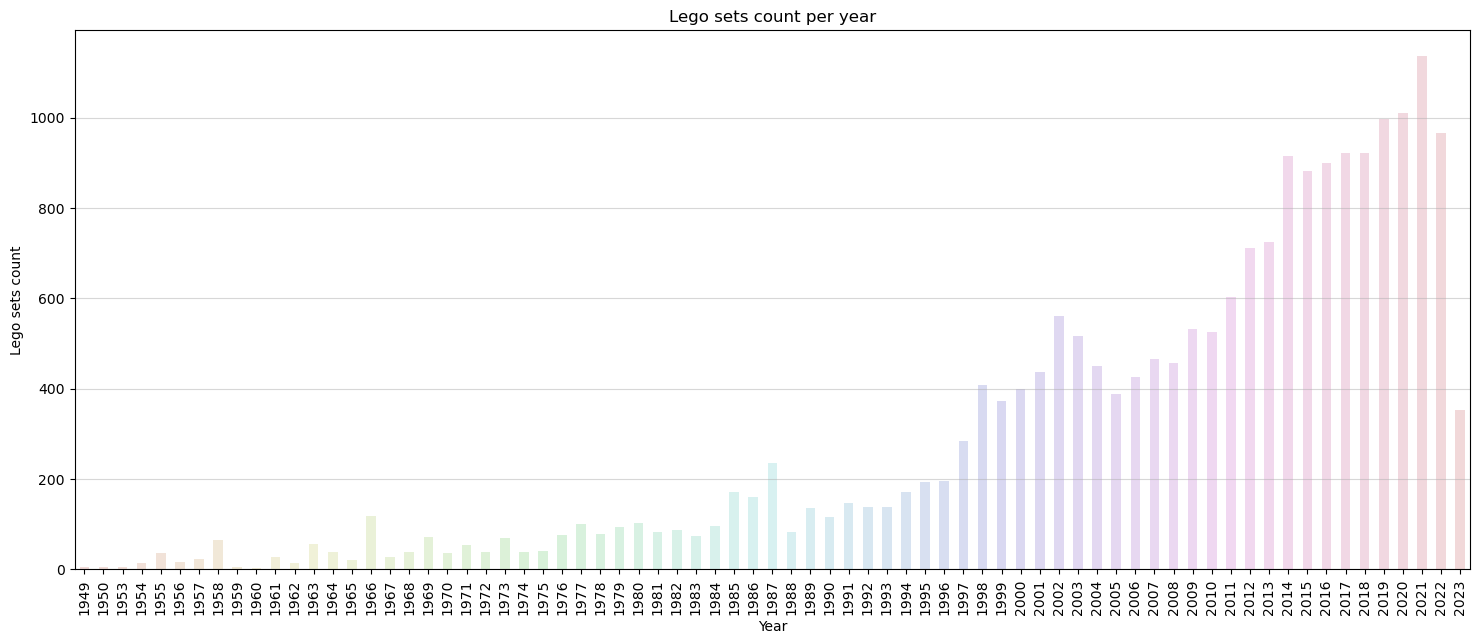

In [29]:
ax = sns.set_style(style=None)
fig, ax = plt.subplots(figsize=(18,7))
plt.grid(axis='y', alpha=0.5)
sns.barplot(data = sets_table_year, x='year', y='Count', alpha=0.25, ax=ax, palette='hls', width=0.5, order=sets_table_year['year']) 
ax.tick_params(axis='x', rotation=90)
ax.set_title('Lego sets count per year')
ax.set_ylabel('Lego sets count')
ax.set_xlabel('Year')
plt.show()

In [22]:
sets_table_year.loc[sets_table_year['year'] < 1960, 'decade'] = 1950 
for decade in range(1960, 2020, 10):
    sets_table_year.loc[np.logical_and(sets_table_year['year'] >= decade, sets_table_year['year'] < decade + 10), 'decade'] = decade 
sets_table_year.loc[sets_table_year['year'] >= 2020, 'decade'] = 2020 
sets_table_year.head()

,year,Count,decade
0,1949,5,1950.0
1,1950,6,1950.0
2,1953,4,1950.0
3,1954,14,1950.0
4,1955,37,1950.0


In [23]:
sets_table_year['decade'].unique()

array([1950., 1960., 1970., 1980., 1990., 2000., 2010., 2020.])

In [26]:
sets_tables_decade = sets_table_year.groupby('decade').agg(Count=('Count', 'sum')).sort_values(by='decade').reset_index()
sets_tables_decade['decade'] = sets_tables_decade['decade'].astype(int)
sets_tables_decade

,decade,Count
0,1950,174
1,1960,413
2,1970,627
3,1980,1225
4,1990,2159
5,2000,4629
6,2010,8104
7,2020,3467


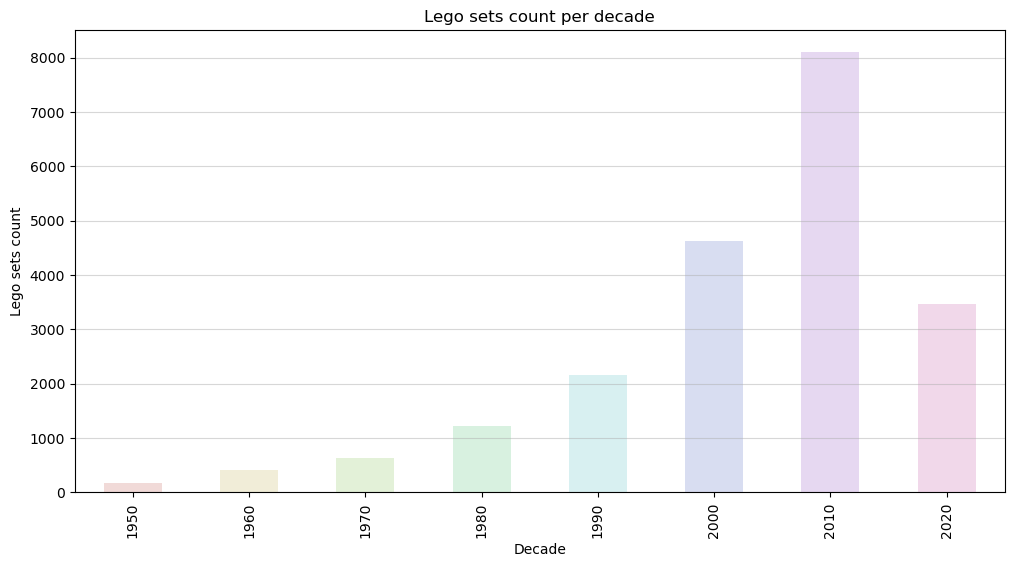

In [27]:
ax = sns.set_style(style=None)
fig, ax = plt.subplots(figsize=(12,6))
plt.grid(axis='y', alpha=0.5)
sns.barplot(data = sets_tables_decade, x='decade', y='Count', alpha=0.25, ax=ax, palette='hls', width=0.5, order=sets_tables_decade['decade']) 
ax.tick_params(axis='x', rotation=90)
ax.set_title('Lego sets count per decade')
ax.set_ylabel('Lego sets count')
ax.set_xlabel('Decade')
plt.show()

## QUESTION 2:
2. What is the average number of Lego parts per year?


## QUESTION 3:
3. Are there any number of parts per set ranges? Like cheaper sets have 0-5 bricks in it or something like this.


## QUESTION 4:
4. Similar as 3 - what was average parts per set in 1950 and what is in 2020?

## QUESTION 5:
5. What are the 5 most popular colors used in Lego parts?


## QUESTION 6:
6. What proportion of Lego parts are transparent?



## QUESTION 7:
7. What are the 5 rarest lego bricks?


## QUESTION 8:
8. Summarize your findings.